Assignment : Customer Churn Prediction

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel('customer_churn_large_dataset.xlsx')
data.head()


,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [42]:
data['Churn'] = data['Churn'].astype('category')

columns_to_drop = ['CustomerID', 'Name']
data.drop(columns=columns_to_drop, inplace=True)

In [43]:
data.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


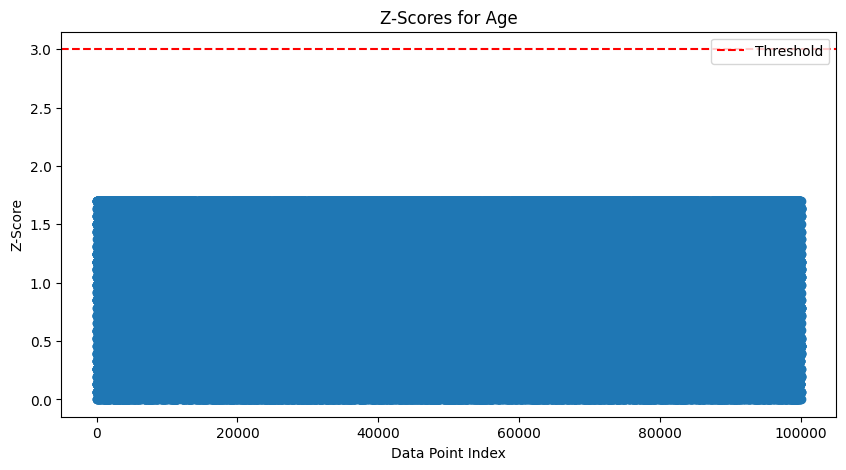

Number of outliers in Age: 0
Outlier indices: []



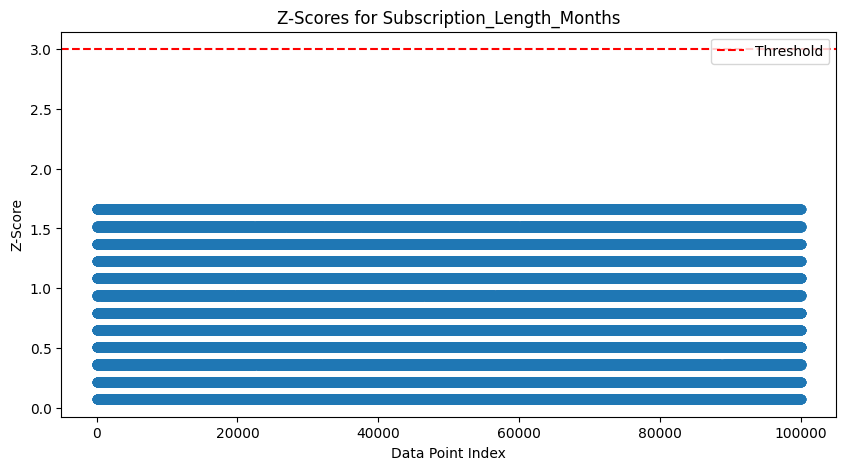

Number of outliers in Subscription_Length_Months: 0
Outlier indices: []



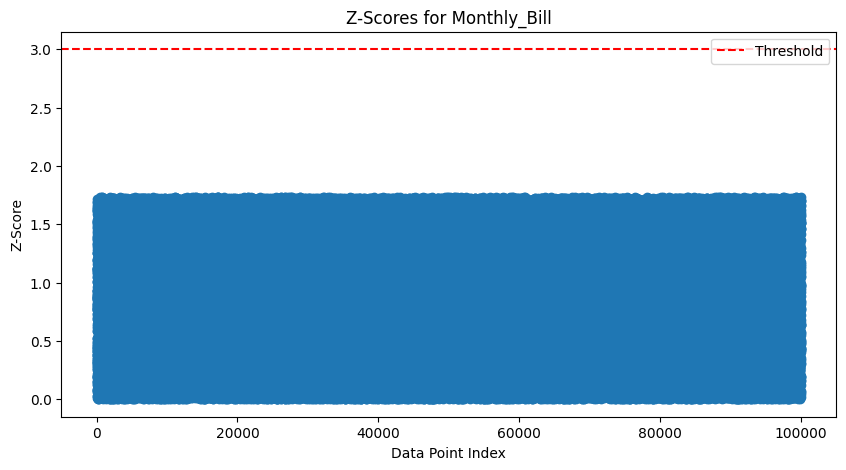

Number of outliers in Monthly_Bill: 0
Outlier indices: []



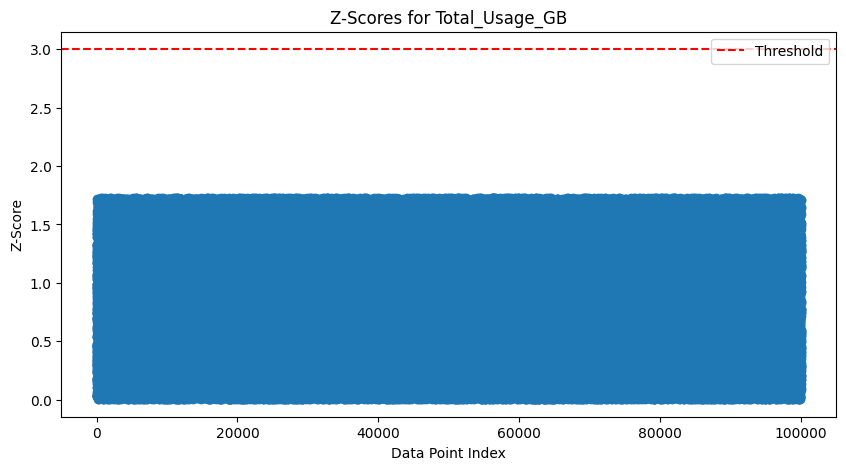

Number of outliers in Total_Usage_GB: 0
Outlier indices: []



In [34]:
import numpy as np
from scipy.stats import zscore

# Numeric columns for outlier check
numeric_columns = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

# Z-score threshold for outlier detection
z_threshold = 3

for column in numeric_columns:
    z_scores = np.abs(zscore(data[column]))
    outliers = z_scores > z_threshold
    
    # Plot Z-scores
    plt.figure(figsize=(10, 5))
    plt.scatter(range(len(z_scores)), z_scores)
    plt.axhline(y=z_threshold, color='r', linestyle='--', label='Threshold')
    plt.xlabel('Data Point Index')
    plt.ylabel('Z-Score')
    plt.title(f'Z-Scores for {column}')
    plt.legend()
    plt.show()

    # Print number of outliers and outlier indices
    num_outliers = np.sum(outliers)
    outlier_indices = np.where(outliers)[0]
    print(f"Number of outliers in {column}: {num_outliers}")
    print(f"Outlier indices: {outlier_indices}\n")

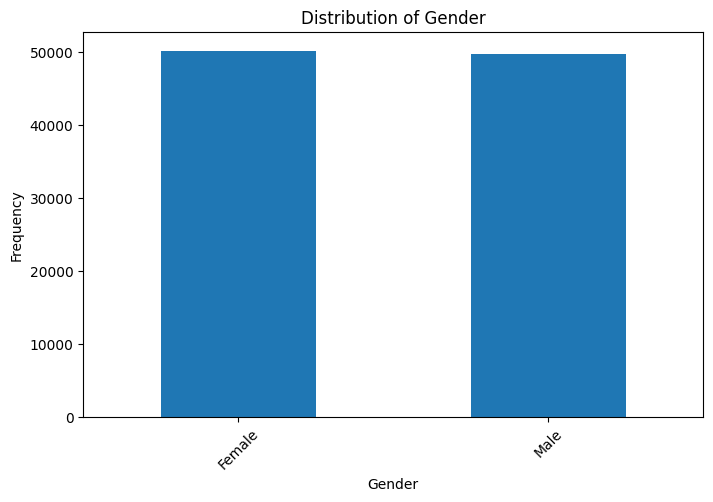

Value counts for Gender:
Gender
Female    50216
Male      49784
Name: count, dtype: int64



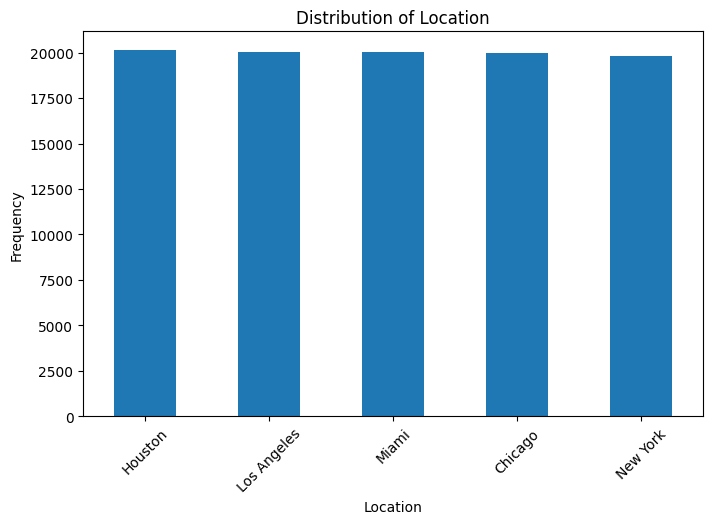

Value counts for Location:
Location
Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: count, dtype: int64



In [35]:
# Categorical columns for analysis
categorical_columns = ['Gender', 'Location']

for column in categorical_columns:
    value_counts = data[column].value_counts()
    
    # Plot bar chart for categorical distribution
    plt.figure(figsize=(8, 5))
    value_counts.plot(kind='bar')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

    # Print value counts
    print(f"Value counts for {column}:\n{value_counts}\n")

In [37]:
from scipy.stats import chi2_contingency

# Categorical columns for analysis
categorical_columns = ['Gender', 'Location']

for column in categorical_columns:
    contingency_table = pd.crosstab(data[column], data['Churn'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Column: {column}")
    print(f"Chi-squared value: {chi2}")
    print(f"P-value: {p_value}")
    print("-----")

Column: Gender
Chi-squared value: 0.4413972946971719
P-value: 0.5064488106432634
-----
Column: Location
Chi-squared value: 10.404170106364795
P-value: 0.03414293762924668
-----


In [44]:
data.drop(columns=['Gender'], inplace=True)

In [45]:
data.head()

,Age,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Los Angeles,17,73.36,236,0
1,62,New York,1,48.76,172,0
2,24,Los Angeles,5,85.47,460,0
3,36,Miami,3,97.94,297,1
4,46,Miami,19,58.14,266,0


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Select independent variables
selected_columns = ['Age', 'Location', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']
X = data[selected_columns]

# Encode categorical 'Location' variable using one-hot encoding
X = pd.get_dummies(X, columns=['Location'], drop_first=True)

# Target variable
y = data['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.4998

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.70      0.59     10079
           1       0.49      0.29      0.37      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.48     20000
weighted avg       0.50      0.50      0.48     20000



In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select independent variables
selected_columns = ['Age', 'Location', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']
X = data[selected_columns]

# Encode categorical 'Location' variable using one-hot encoding
X = pd.get_dummies(X, columns=['Location'], drop_first=True)

# Convert one-hot encoded columns to float type
X = X.astype(float)

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


                     Variable       VIF
0                         Age  6.837461
1  Subscription_Length_Months  3.802294
2                Monthly_Bill  7.621445
3              Total_Usage_GB  4.666264
4            Location_Houston  1.848491
5        Location_Los Angeles  1.842157
6              Location_Miami  1.843730
7           Location_New York  1.833146


In [56]:
columns_to_drop = ['Age', 'Monthly_Bill']
data.drop(columns=columns_to_drop, inplace=True)


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Select independent variables
selected_columns = ['Location', 'Subscription_Length_Months', 'Total_Usage_GB']
X = data[selected_columns]

# Encode categorical 'Location' variable using one-hot encoding
X = pd.get_dummies(X, columns=['Location'], drop_first=True)

# Target variable
y = data['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.5040

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67     10079
           1       0.00      0.00      0.00      9921

    accuracy                           0.50     20000
   macro avg       0.25      0.50      0.34     20000
weighted avg       0.25      0.50      0.34     20000



/home/faizan-beigh/Code Playground/Customer_Churn/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/faizan-beigh/Code Playground/Customer_Churn/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/faizan-beigh/Code Playground/Customer_Churn/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th